# Die KQ-Methode

In dieser Übung werden wir als Beispiel Daten über ein Buchhaltungsunternehmen verwenden. Das Unternehmen erhält täglich Rechnungen von seinen Kunden und bearbeitet sie (z.B. prüft sie, gibt sie in das Buchhaltungssystem ein, etc.). Der Datensatz enthält die Anzahl der bearbeiteten Rechnungen an jedem Tag und die dafür benötigte Zeit. Unser Ziel ist es, die Zeit vorherzusagen, die benötigt wird, um eine gegebene Anzahl von Rechnungen zu bearbeiten.

Die Variablen in dem Datensatz sind:

- `Day` (numeric): Tag der Beobachtung
- `Invoices` (numeric): Die Anzahl der bearbeiteten Rechnungen
- `Time` (numeric): Die Bearbeitungszeit in Stunden

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Einlesen der Daten
invoices = pd.read_csv('https://raw.githubusercontent.com/febse/data/main/econ/invoices.txt', delimiter="\t")
invoices.head()

,Day,Invoices,Time
0,1,149,2.1
1,2,60,1.8
2,3,188,2.3
3,4,23,0.8
4,5,201,2.7


Eine erste Zusammenfassung der Daten

In [3]:
invoices.describe()

,Day,Invoices,Time
count,30.000000,30.000000,30.00000
mean,15.500000,130.033333,2.11000
std,8.803408,74.825537,0.90491
min,1.000000,23.000000,0.80000
25%,8.250000,62.500000,1.50000
50%,15.500000,127.500000,2.00000
75%,22.750000,189.500000,2.77500
max,30.000000,289.000000,4.10000


Zuerst werden wir den Datensatz in einem Streudiagramm visualisieren. Der Zweck der Visualisierung ist es, eine erste Einsicht über die Assoziation zwischen den Variablen `Invoices` und `Time` zu bekommen.

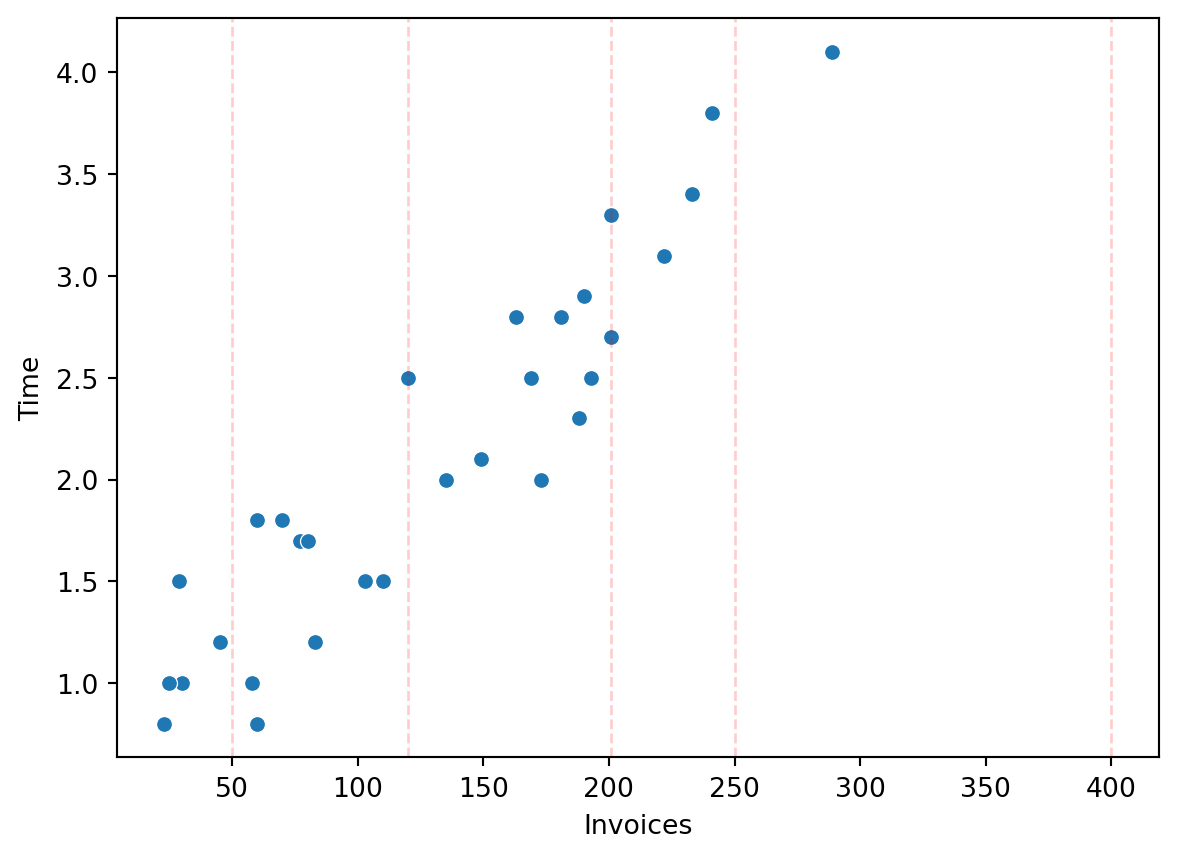

In [4]:
#| label: fig-invoices-scatter
#| fig-cap: Streudiagramm der Bearbeitungszeit der Rechnungen und der Anzahl der Rechnungen.

fig, ax = plt.subplots()

sns.scatterplot(data=invoices, x="Invoices", y="Time", ax=ax)

for x in [50, 120, 201, 250, 400]:
    ax.axvline(x, color='r', linestyle='--', lw=1, alpha=0.2)

Wie können wir die Zeit vorhersagen, die benötigt wird, um eine gegebene Anzahl von Rechnungen zu bearbeiten? Die roten vertikalen Geraden in @fig-invoices-scatter sind bei 50, 120, 201, 250, 400 Rechnungen gezeichnet.

**Strategie 1**

Eine einfache Methode wäre, die Bearbeitungszeit einfach mit der durchschnittlichen Bearbeitungszeit vorherzusagen.

$$
\widehat{\text{Time}}^{Strategie 1} = \overline{\text{Time}}
$$

**Strategie 2**

Eine andere Möglichkeit wäre, eine Gleichung zu unterstellen, um die Anzahl der Rechnungen zu berücksichtigen. Eine lineare Gleichung könnte z.B. so aussehen (die Koeffizienten sind hier nur Beispiele, es gibt keine konkrete Rechtfertigung für diese Werte):

$$
\widehat{\text{Time}}^{Strategie 2} = 0.6 + 0.01 \text{Invoices}
$$


:::{#exr-prediction-strategies}
## Aufgabe 1
Berechnen Sie die Prognosen für die Bearbeitungszeit für die zwei Strategien für jeden Tag in den Daten. Speichern Sie die Vorhersagen in den Variablen `Time_predicted_1` und `Time_predicted_2`.

:::


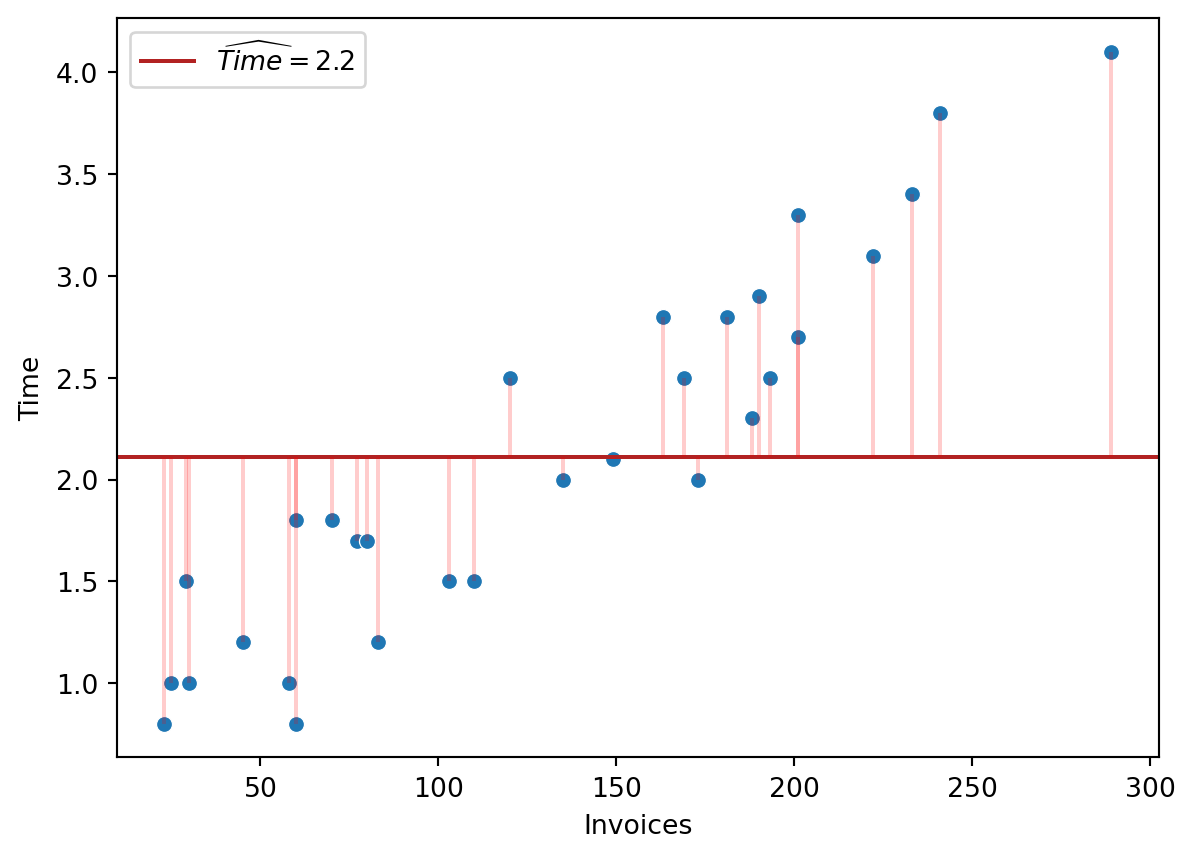

In [6]:
#| label: fig-invoices-scatter-mean
#| fig-cap: Streudiagramm der Bearbeitungszeit der Rechnungen und der Anzahl der Rechnungen mit Mittelwert der Bearbeitungszeit.
#| fold-code: true

Time_predicted_1 = invoices["Time"].mean()

res_eq1 = invoices['Time'] - Time_predicted_1

fig, ax = plt.subplots()

sns.scatterplot(data=invoices, x="Invoices", y="Time", ax=ax)

ax.axhline(y=Time_predicted_1, xmin=0, xmax=300, color="firebrick", label=r"$\widehat{Time} = 2.2$")
ax.legend(loc=0)
ax.vlines(x=invoices["Invoices"], ymin=Time_predicted_1, ymax=invoices["Time"], color="red", alpha=0.2)

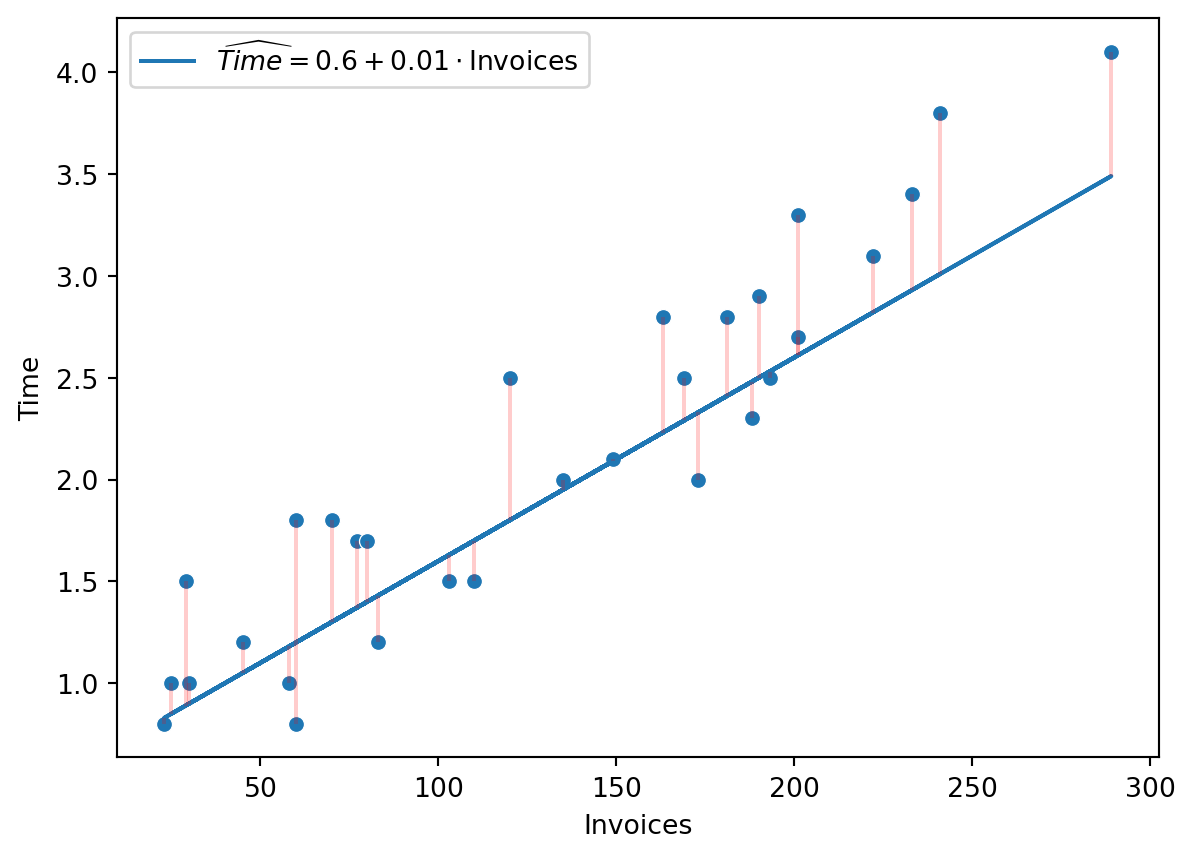

In [7]:
#| label: fig-invoices-scatter-2
#| fig-cap: r"Streudiagramm der Bearbeitungszeit der Rechnungen und der Anzahl der Rechnungen und die Prognosegleichung $\widehat{Time} = 0.6 + 0.01 \cdot Invoices$."
#| fold-code: true

Time_predicted_2 = 0.6 + 0.01 * invoices['Invoices']

fig, ax = plt.subplots()

sns.scatterplot(data=invoices, x="Invoices", y="Time", ax=ax)

ax.plot(invoices["Invoices"], Time_predicted_2, "-", label=r"$\widehat{Time} = 0.6 + 0.01 \cdot \text{Invoices}$")
ax.legend(loc=0)
ax.vlines(x=invoices["Invoices"], ymin=Time_predicted_2, ymax=invoices["Time"], color="red", alpha=0.2)

Welche Strategie passt ist besser? Um dieser Frage eine Antwort zu geben, müssen wir uns auf ein Kriterium einigen, das wir verwenden, um die Vorhersagen zu bewerten und zu vergleichen.

Wir könnten z.B. das durchschnittliche Residuum in Betracht ziehen. Allerdings ist es ungeeignet (wieso?).

$$
\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

Dabei sind $y_i$ die beobachteten Werte und $\hat{y}_i$ die Prognosen.

Dieses scheint allerdings unsinnige Ergebnisse zu produzieren, denn die Prognosen des zweiten Modells offensichtlich näher an den Daten liegen. Die Summe der Abweichungen ist allerdings größer als beim ersten Modell. Das liegt daran, daß sich positive und negative Abweichungen in der Summe gegenseitig aufheben. Um das zu vermeiden, könnten wir die z.B. die Beträge der Abweichungen summieren

$$
\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

Es ist allerdings viel einfacher, die quadratischen Abweichungen zu summieren, denn die quadratische Funktion ist stetig differenzierbar und das ist mathematisch sehr bequem.

$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Um hervorzuheben, daß die Residuenquadratsumme von den Koeffizienten $\hat{\beta}_0$ und $\hat{\beta}_1$ abhängt, schreiben wir die Residuenquadratsumme als Funktion der Koeffizienten.

$$
\text{RSS}(\hat{\beta}_0, \hat{\beta}_1) = \sum_{i=1}^{n} (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2
$$


:::{#exr-mse}
## Aufgabe 2
Berechnen Sie die Residuen für die beiden Strategien und speichern Sie sie in den Variablen `Residuals_1` und `Residuals_2`.
Berechnen Sie das durchschnittliche Residuum, die Residuenquadratsumme (RSS) und MSE für die beiden Strategien. Welche Strategie ist besser?

:::

In [8]:
# Strategie 1

Time_predicted_1 = invoices["Time"].mean()
Residuals_1 = invoices["Time"] - Time_predicted_1

average_residual_1 = np.mean(Residuals_1)
# Oder mit der .mean()-Methode
# average_residual_1 = Residuals_1.mean()

rss1 = np.sum(Residuals_1**2)
# Oder mit der .sum()-Methode
# rss1 = (Residuals_1 ** 2).sum()
mse_1 = rss1 / len(invoices)

print(f"Average residual (Strategie 1): {average_residual_1}")
print(f"RSS (Strategie 1): {rss1}")
print(f"MSE (Strategie 1): {mse_1}")


Average residual (Strategie 1): 9.62193288008469e-17
RSS (Strategie 1): 23.746999999999996
MSE (Strategie 1): 0.7915666666666665


In [9]:
# Strategie 2
Time_predicted_2 = 0.6 + 0.01 * invoices["Invoices"]
Residuals_2 = invoices["Time"] - Time_predicted_2

average_residual_2 = np.mean(Residuals_2)
rss2 = np.sum(Residuals_2**2)
mse_2 = rss2 / len(invoices)

print(f"Average residual (Strategie 2): {average_residual_2}")
print(f"RSS (Strategie 2): {rss2}")
print(f"MSE (Strategie 2): {mse_2}")



Average residual (Strategie 2): 0.20966666666666658
RSS (Strategie 2): 4.634699999999999
MSE (Strategie 2): 0.15448999999999996


In [10]:
# Ihre Strategie
# Versuchen Sie eine eigene Strategie zu entwickeln, indem Sie Koeffizienten 
# wählen, die die Residuenquadratsumme möglichst klein machen.

# Berechnen Sie die RSS für Ihre Strategie und vergleichen Sie sie mit den anderen Strategien.



Lasst uns die Residuenquadratsumme für verschiedene Werte der Koeffizienten berechnen und die Ergebnisse graphisch darstellen. Wir werden die Residuenquadratsumme als Funktion der Koeffizienten in einem 3D-Diagramm darstellen.

Text(0.5, 0, 'RSS')

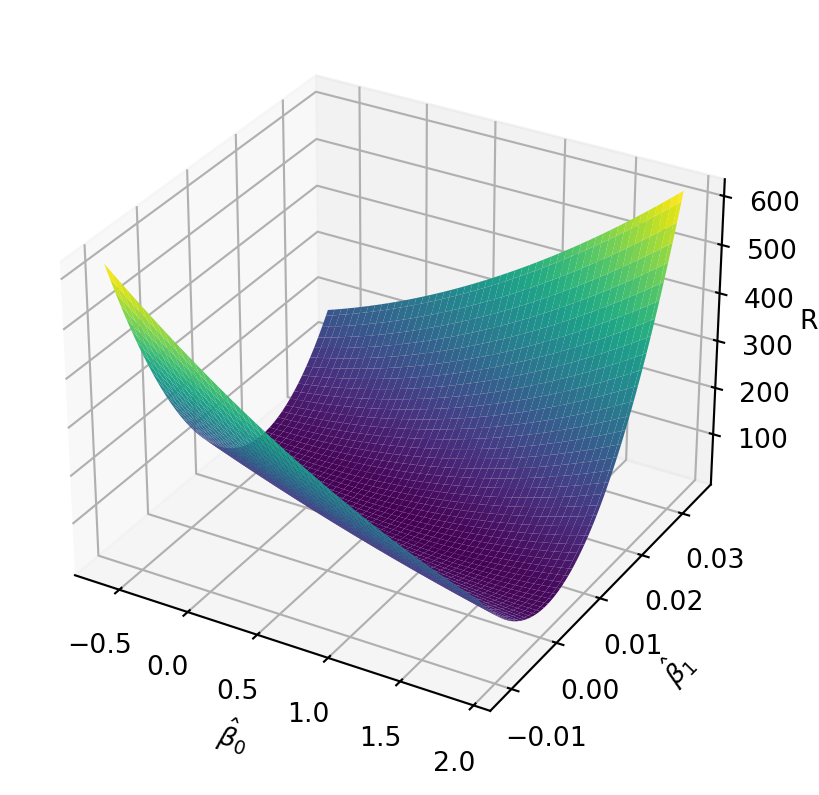

In [11]:
#| label: fig-invoices-rss
#| fig-cap: r"RSS für verschiedene Werte der Koeffizienten $\hat{\beta}_0$ und $\hat{\beta}_1$."
#| code-fold: true

# NOTE: der Code ist nur da, um die RSS zu berechnen und zu visualisieren.
# Sie müssen ihn nicht studieren oder verstehen

exp_f = 2

bb0, bb1 = np.meshgrid(
    np.linspace(0.6417 - 0.6417 * exp_f, 0.6417 + 0.6417 * exp_f, 100),
    np.linspace(0.0113 - 0.0113 * exp_f, 0.0113 + 0.0113 * exp_f, 100)
)

rss = np.zeros_like(bb0)

for i in range(bb0.shape[0]):
    for j in range(bb0.shape[1]):
        time_predicted = bb0[i, j] + bb1[i, j] * invoices['Invoices']
        res = invoices['Time'] - time_predicted
        rss[i, j] = np.sum(res**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(bb0, bb1, rss, cmap='viridis')

ax.set_xlabel(r"$\hat{\beta}_0$")
ax.set_ylabel(r"$\hat{\beta}_1$")
ax.set_zlabel('RSS')

## KQ-Methode im Modell nur mit einer Konstante

Zuerst werden wir das Problem in einem sehr einfachen Fall betrachten. Betrachten wir die Prognosegleichung

$$
\hat{y} = \hat{\beta}_0
$$

Die Prognose ist für alle Werte von $x$ gleich $\hat{\beta}_0$ (d.h. die Prognose ist eine horizontale Gerade). Wo sollten wir diese horizontale Gerade zeichnen, um die Residuenquadratsumme zu minimieren?

Für die Gleichung oben ist die Residuenquadratsumme:

$$
\text{RSS}(\hat{\beta}_0) = \sum_{i=1}^{n} (y_i - \hat{\beta}_0)^2
$$

In @fig-invoices-rss-beta0 ist die RSS für mehrere Werte von $\hat{\beta}_0$ zwischen 1.1 und 3.1 dargestellt.


Text(0, 0.5, '$RSS(\\hat{\\beta}_0)$')

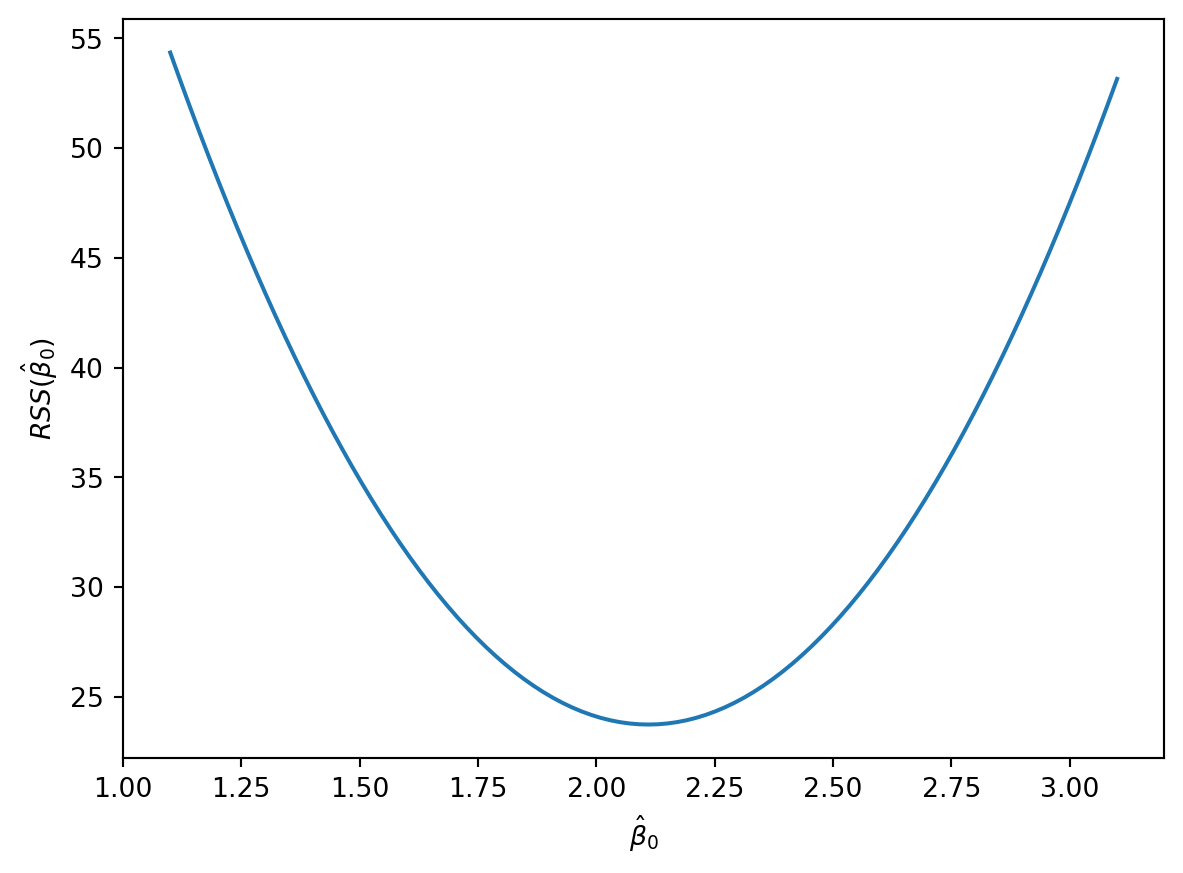

In [12]:
#| label: fig-invoices-rss-beta0
#| fig-cap: r"RSS für verschiedene Werte $\hat{\beta}_0$ im Modell $\widehat{Time} = \hat{\beta}_0$."
#| code-fold: true

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

beta0 = np.linspace(2.1 - 1, 2.1 + 1, 100)
rss_beta0 = np.zeros_like(beta0)

for i in range(len(beta0)):    
    res = invoices['Time'] - beta0[i]
    rss_beta0[i] = np.sum(res**2)

ax.plot(beta0, rss_beta0)
ax.set_xlabel(r"$\hat{\beta}_0$")
ax.set_ylabel(r"$RSS(\hat{\beta}_0)$")




:::{#exr-rss-1d}    
## Das Modell nur mit einer Konstante

Leiten Sie den Wert von $\hat{\beta}_0$ her, der die Residuenquadratsumme minimiert.
:::


:::{.callout-note collapse="true"}
## Beweis

Wir fangen mit der ersten Ableitung der Residuenquadratsumme nach $\hat{\beta}_0$ an.

$$
\begin{align*}
\frac{\partial}{\partial \hat{\beta}_0} RSS(\hat{\beta}_0) & = 
\sum_{i=1}^n 2(y_i - \hat{\beta}_0) \cdot (-1) \\
& = -2 \sum_{i=1}^n (y_i - \hat{\beta}_0) \\
& = -2 \sum_{i=1}^n y_i + 2 \sum_{i=1}^n \hat{\beta}_0 \\
& = -2 \sum_{i=1}^n y_i + 2 n \hat{\beta}_0
\end{align*}
$$

Die notwendige Bedingung für ein Extremum (Minimum oder Maximum) ist, daß die erste Ableitung gleich Null ist.

$$
\begin{align*}
-2 \sum_{i=1}^n y_i + 2 n \hat{\beta}_0 & = 0 \\
\hat{\beta}_0 & = \frac{1}{n} \sum_{i=1}^n y_i \\
& = \overline{y}
\end{align*}
$$

Der optimale Wert von $\hat{\beta}_0$, der die Residuenquadratsumme minimiert, ist einfach der Durchschnitt der beobachteten Werte.
:::

## Das Modell mit einer Variable ohne Konstante

Lasst uns jetzt das Modell mit einer Variable betrachten, aber ohne Konstante. Die Prognosegleichung ist

$$
\hat{y} = \hat{\beta}_1 x
$$

Leiten Sie den Wert von $\hat{\beta}_1$ her, der die Residuenquadratsumme minimiert.

:::{#callout-note collapse="true"}
## Herleitung

Wir fangen mit der ersten Ableitung der Residuenquadratsumme nach $\hat{\beta}_1$ an.

$$
\begin{align*}
\frac{\partial}{\partial \hat{\beta}_1} RSS(\hat{\beta}_1) & =
\sum_{i=1}^n 2(y_i - \hat{\beta}_1 x_i) \cdot (-x_i) \\
& = -2 \sum_{i=1}^n x_i y_i + 2 \hat{\beta}_1 \sum_{i=1}^n x_i^2
\end{align*}
$$

Die notwendige Bedingung für ein Extremum (Minimum oder Maximum) ist, daß die erste Ableitung gleich Null ist.

$$
\begin{align*}
-2 \sum_{i=1}^n x_i y_i + 2 \hat{\beta}_1 \sum_{i=1}^n x_i^2 & = 0 \\
\hat{\beta}_1 \sum_{i=1}^n x_i^2 & = \sum_{i=1}^n x_i y_i \\
\hat{\beta}_1 & = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2} \\
& = \frac{\frac{1}{n}\sum_{i=1}^n x_i y_i}{\frac{1}{n}\sum_{i=1}^n x_i^2} \\
& = \frac{\overline{x y}}{\overline{x^2}}
\end{align*}
$$

:::


## Das Modell mit einer Variable und einer Konstante

Im Modell mit einer Konstante und einem Predictor ist die Prognosegleichung
$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x
$$

Die RSS ist

$$
\begin{align*}
\text{RSS}(\hat{\beta}_0, \hat{\beta}_1) & = \sum_{i=1}^n (y_i - \hat{y}_i)^2 \\
  & = \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2
\end{align*}
$$

Die notwendige Bedingung für ein Extremum (Minimum oder Maximum) ist, dass die erste Ableitung gleich Null ist.

$$
\begin{align*}
\frac{\partial}{\partial \hat{\beta}_0} \text{RSS}(\hat{\beta}_0, \hat{\beta}_1) & = -2 \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) = 0 \\
\frac{\partial}{\partial \hat{\beta}_1} \text{RSS}(\hat{\beta}_0, \hat{\beta}_1) & = -2 \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) x_i = 0
\end{align*}
$$

Aus der ersten Gleichung erhalten wir

$$
\begin{align*}
\sum_{i=1}^n y_i - \hat{\beta}_0 n - \hat{\beta}_1 \sum_{i=1}^n x_i & = 0 \\
\hat{\beta}_0 n + \hat{\beta}_1 \sum_{i=1}^n x_i & = \sum_{i=1}^n y_i \\
\hat{\beta}_0 & = \overline{y} - \hat{\beta}_1 \overline{x}
\end{align*}
$$

Die zweite Gleichung ergibt

$$
\begin{align*}
\sum_{i=1}^n y_i x_i - \hat{\beta}_0 \sum_{i=1}^n x_i - \hat{\beta}_1 \sum_{i=1}^n x_i^2 & = 0 \\
\hat{\beta}_0 \sum_{i=1}^n x_i + \hat{\beta}_1 \sum_{i=1}^n x_i^2 & = \sum_{i=1}^n y_i x_i \\
\hat{\beta}_0 & = \overline{y} - \hat{\beta}_1 \overline{x}
\end{align*}
$$

Wir setzen für $\hat{\beta}_0$ in die zweite Gleichung ein und erhalten

$$
\begin{align*}
(\overline{y} - \hat{\beta}_1 \overline{x}) \sum_{i=1}^n x_i + \hat{\beta}_1 \sum_{i=1}^n x_i^2 & = \sum_{i=1}^n y_i x_i \\
\overline{y} \sum_{i=1}^n x_i - \hat{\beta}_1 \overline{x} \sum_{i=1}^n x_i + \hat{\beta}_1 \sum_{i=1}^n x_i^2 & = \sum_{i=1}^n y_i x_i \\
\hat{\beta}_1 \sum_{i=1}^n x_i^2 & = \sum_{i=1}^n y_i x_i - \overline{y} \sum_{i=1}^n x_i + \hat{\beta}_1 \overline{x} \sum_{i=1}^n x_i \\
\hat{\beta}_1 & = \frac{\sum_{i=1}^n y_i x_i - \overline{y} \sum_{i=1}^n x_i}{\sum_{i=1}^n x_i^2 - \overline{x} \sum_{i=1}^n x_i}
\end{align*}
$$

Nun können wir die Ausdrücke vereinfachen und erhalten

$$
\begin{align*}
\hat{\beta}_1 & = \frac{\overline{x y} - \overline{x} \cdot \overline{y}}{\overline{x^2} - \overline{x}^2} \\
\hat{\beta}_0 & = \overline{y} - \hat{\beta}_1 \overline{x}
\end{align*}
$$

The last expression may seem a bit complicated, but it is actually quite simple. It is just the ratio between the empirical covariance between $x_i$ and $y_i$ divided by the variance of $x_i$.

The empirical covariance between $x_i$ and $y_i$ is defined as the sum of the products of the deviations of $x_i$ and $y_i$ from their respective means, divided by the number of observations.

:::{#def-covariance}
## Empirische Kovarianz

Die empirische Kovarianz zwischen zwei Variablen $x$ und $y$ mit $n$ Werten ist definiert als

$$
S_{xy} = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})
$$

:::


:::{#thm-covariance-decomposition}
## Alternative Formel für die Kovarianz

Die Kovarianz definiert in @def-covariance lässt sich auch darstellen als

$$
(n - 1) S_{xy} = n(\overline{x y} - \overline{x} \overline{y})
$$

:::
:::{.callout-note collapse="true"}
## Beweis
Der Beweis folgt den gleichen Schritten wie der Beweis für die alternative Darstellung der empirischen Varianz.

$$
\begin{align*}
(n - 1) S_{xy} & = \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y}) \\
& = \sum_{i=1}^n x_i y_i - \overline{x} \sum_{i=1}^n y_i - \overline{y} \sum_{i=1}^n x_i + n \overline{x} \overline{y} \\
& = n(\overline{x y} - \overline{x} \overline{y})
\end{align*}
$$
:::


:::{#thm-variance-decomposition}
## Alternative Varianzformel

Wir haben bereits die empirische Kovarianz definiert als

$$
S_x^2 = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \overline{x})^2
$$

Wir können zeigen, dass die folgende Darstellung für die empirische Varianz gilt

$$
S_x^2 = \frac{n}{n  - 1}(\overline{x_i^2} - \overline{x}^2)
$$
:::
:::{.callout-note collapse="true"}
## Beweis

Wir benutzen die Definition der Varianz und die Definition des Mittelwertes.

$$
\begin{align*}
(n - 1) S_x^2 & =  \sum_{i=1}^n (x_i - \overline{x})^2 \\
& =  \sum_{i=1}^n (x_i^2 - 2x_i \overline{x} + \overline{x}^2) \\
& =  \sum_{i=1}^n x_i^2 - 2\overline{x} \sum_{i=1}^n x_i + \overline{x}^2 \sum_{i=1}^n 1 \\
& =  \sum_{i=1}^n x_i^2 - 2\overline{x} \sum_{i=1}^n x_i + \overline{x}^2 n \\
& =  \sum_{i=1}^n x_i^2 - 2\overline{x}^2 n + \overline{x}^2 n \\
& =  \sum_{i=1}^n x_i^2 - n \overline{x}^2 \\
& = n (\overline{x^2} - \overline{x}^2)
\end{align*}
$$
:::

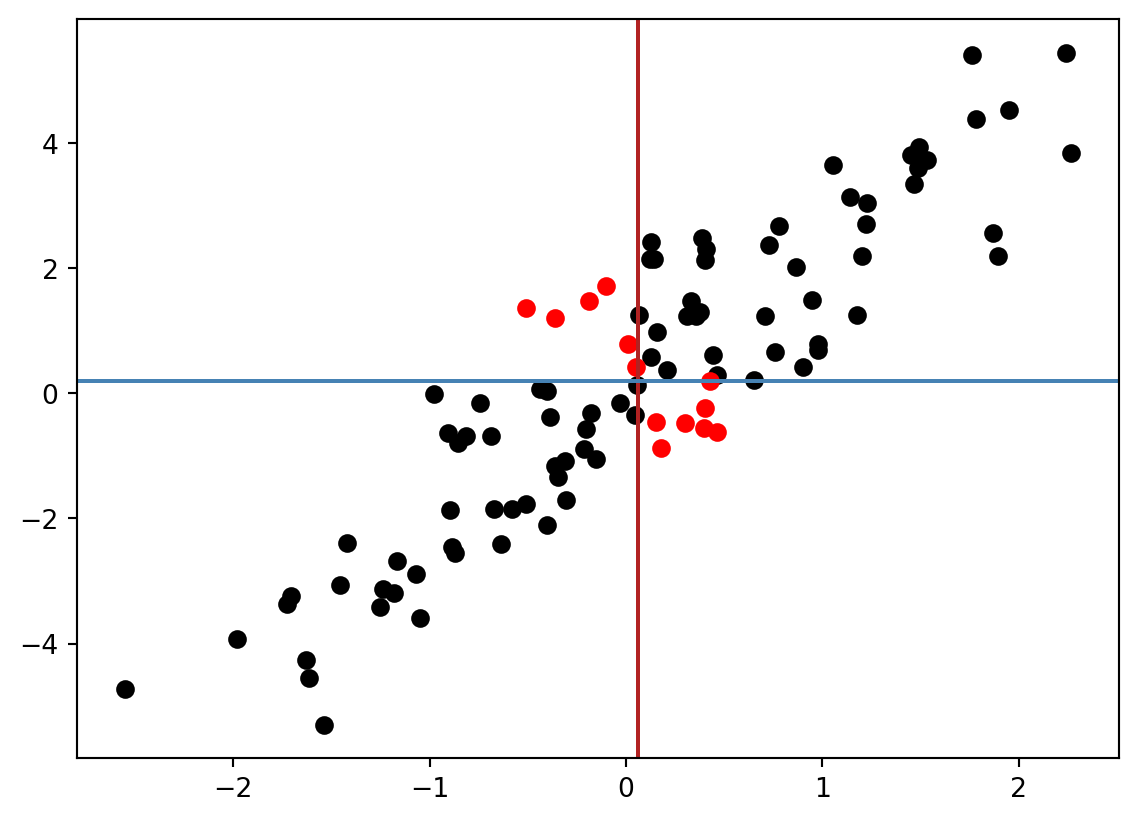

In [13]:
#| label: fig-covariance-positive
#| fig-cap: Streudiagramm mit positiver Kovarianz
#| fold-code: true

# Set seed for reproducibility
np.random.seed(0)

# Create a DataFrame
x = np.random.normal(size=100, loc=0, scale=1)
y = 2 * x + np.random.normal(size=100, scale=1)

prod_pos = (x > x.mean()) * (y > y.mean()) + (x <= x.mean()) * (y <= y.mean())
prod_neg = np.logical_not(prod_pos)

# Plot
plt.scatter(x[prod_pos], y[prod_pos], color="black")
plt.scatter(x[prod_neg], y[prod_neg], color="red")

plt.axvline(x.mean(), color='firebrick', label='Mittelwert von x')
plt.axhline(y.mean(), color='steelblue', label='Mittelwert von y')



Die rote Linie ist bei dem Durchschnitt der $x$-Werte gezeichnet und die blaue Linie ist bei dem Durchschnitt der $y$-Werte gezeichnet. Die Kovarianz misst das durchschnittliche Produkt der Abweichungen der $x$-Werte von ihrem Durchschnitt und der $y$-Werte von ihrem Durchschnitt. Das Produkt ist positiv, wenn die $x$-Werte und die $y$-Werte gleichzeitig über oder unter ihren Durchschnitten liegen. Das Produkt ist negativ, wenn die $x$-Werte über ihrem Durchschnitt liegen, während die $y$-Werte unter ihrem Durchschnitt liegen, oder umgekehrt.

In [14]:
# Kovarianz von zwei NumPy-Arrays
# Achten Sie darauf, dass eine ganze Kovarianzmatrix zurückgegeben wird.
# Die Diagonalelemente sind die Varianzen der einzelnen Arrays.

np.cov(x, y)

array([[1.02608749, 2.16986562],
       [2.16986562, 5.65646178]])

In [15]:
np.var(x, ddof=1)

1.0260874941564961

In [16]:
np.var(y, ddof=1)

5.656461778144082


Nur das *Vorzeichen* der Kovarianz ist wichtig. Die Größe der Kovarianz hängt von den Einheiten der Variablen ab. Um die Kovarianz dimensionslos zu machen, können wir sie durch das Produkt der Standardabweichungen der beiden Variablen teilen. Das gibt uns den Korrelationskoeffizienten.

In [17]:
np.cov(x, 20 * y)

array([[1.02608749e+00, 4.33973123e+01],
       [4.33973123e+01, 2.26258471e+03]])

Lasst uns auch ein Beispiel betrachten, wo die Kovarianz negativ ist. In dem folgenden Code ändern wir nur das Vorzeichen des Koeffizienten von `x` in der Gleichung von `y`.

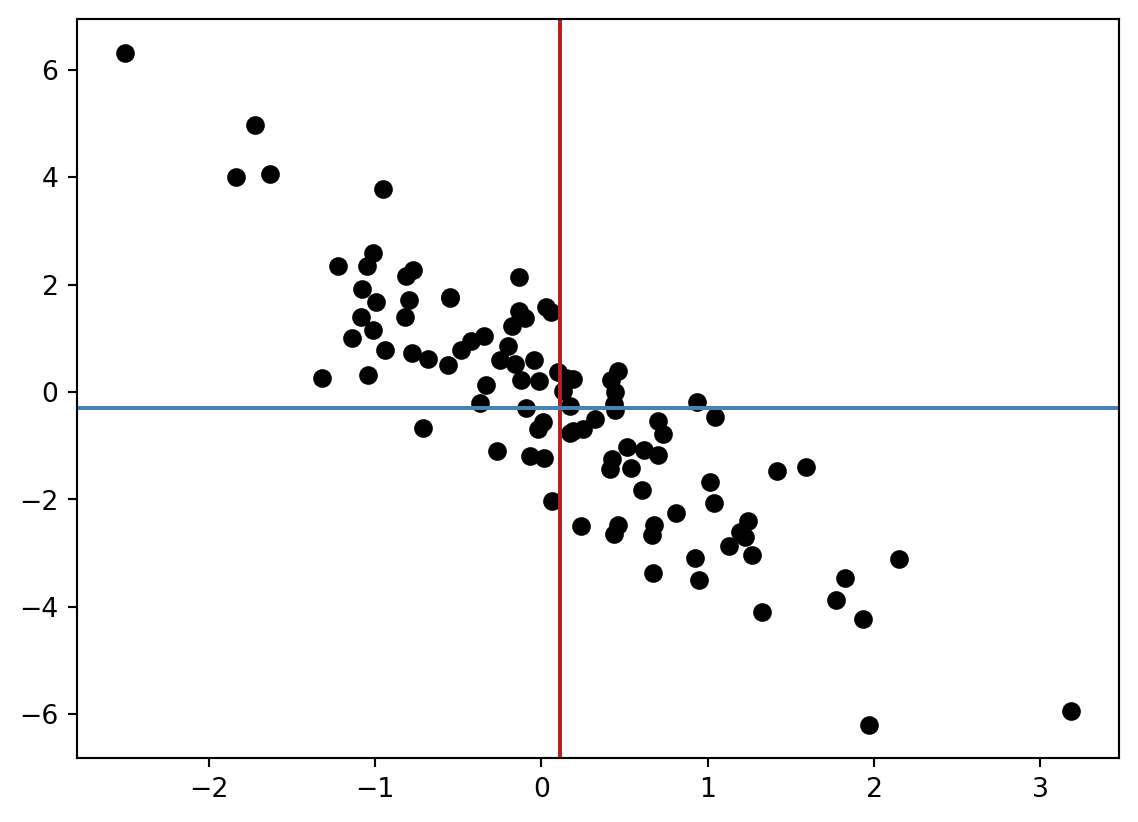

In [18]:
#| label: fig-covariance-negative
#| fig-cap: Streudiagramm von x und y mit negativer Kovarianz.
#| code-fold: true

# Set seed for reproducibility
np.random.seed(23)

# Create a DataFrame
x1 = np.random.normal(size=100, loc=0, scale=1)
y1 = - 2 * x1 + np.random.normal(size=100, scale=1)

# Plot
plt.scatter(x1, y1, color="black")
plt.axvline(x1.mean(), color='firebrick', label='Mittelwert von x')
plt.axhline(y1.mean(), color='steelblue', label='Mittelwert von y')

In [19]:
np.cov(x1, y1)

array([[ 0.90312011, -1.81047309],
       [-1.81047309,  4.67610569]])

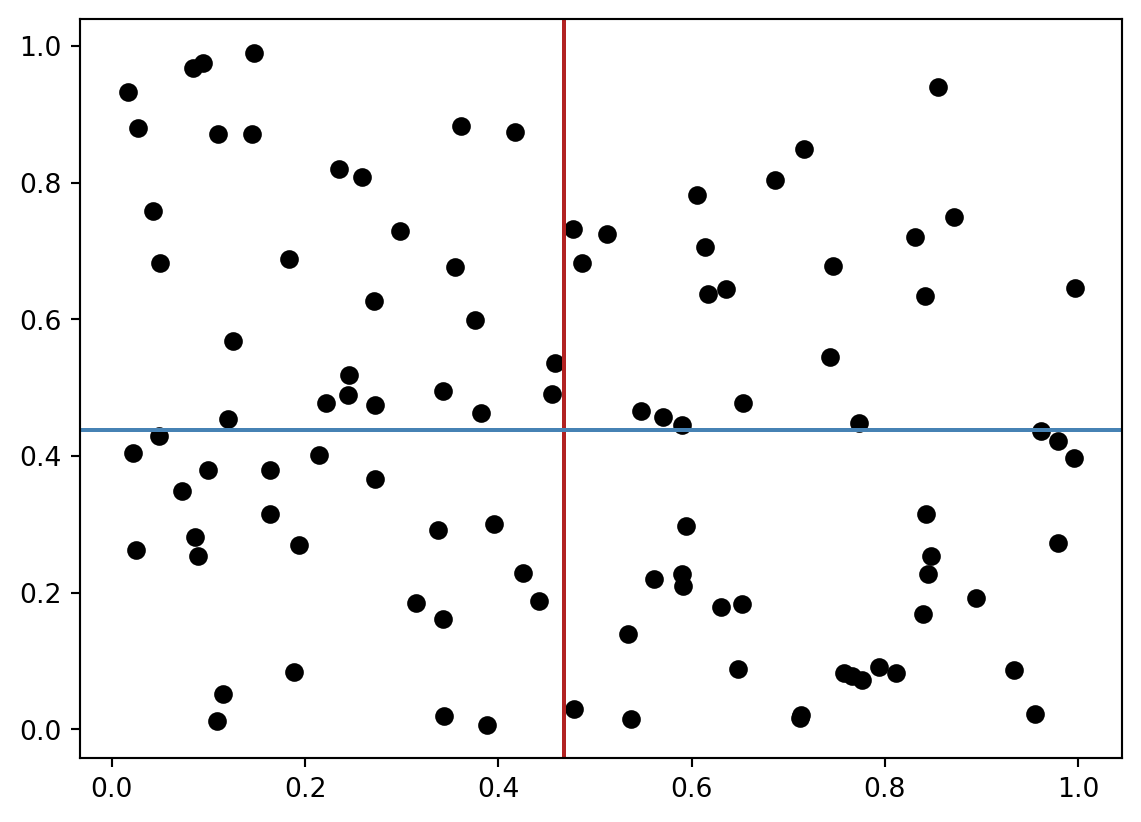

In [20]:
#| label: fig-covariance-independence
#| fig-cap: Streudiagramm von x und y mit unabhängigen Variablen.
#| fold-code: true

x_rand = np.random.uniform(size=100)
y_rand = np.random.uniform(size=100)

fig, ax = plt.subplots()
ax.scatter(x_rand, y_rand, color="black")

ax.axvline(x_rand.mean(), color='firebrick', label='Mittelwert von x')
ax.axhline(y_rand.mean(), color='steelblue', label='Mittelwert von y')

In [21]:
np.cov(x_rand, y_rand)

array([[ 0.08527383, -0.01966643],
       [-0.01966643,  0.07947542]])

In [22]:
np.corrcoef(x_rand, y_rand)

array([[ 1.        , -0.23889178],
       [-0.23889178,  1.        ]])


:::{#def-correlation}
## Korrelationskoeffizient

Der empirische Korrelationskoeffizient zwischen zwei Variablen $x$ und $y$ mit $n$ Werten ist definiert als

$$
r_{xy} = \frac{S_{xy}}{S_x S_y}
$$

dabei ist $S_{xy}$ die Kovarianz zwischen $x$ und $y$, und $S_x$ und $S_y$ sind die Standardabweichungen von $x$ und $y$.
:::

Weil die Kovarianz durch das Produkt der Standardabweichungen geteilt wird, ist der Korrelationskoeffizient dimensionslos. Außerdem ist der Korrelationskoeffizient immer zwischen -1 und 1. Ein Korrelationskoeffizient von 1 bedeutet, dass die beiden Variablen auf einer Geraden mit positiver Steigung liegen. Ein Korrelationskoeffizient von -1 bedeutet, dass die beiden Variablen auf einer Geraden mit negativer Steigung liegen. Ein Korrelationskoeffizient von 0 bedeutet, dass es keine *lineare* Assoziation zwischen den beiden Variablen gibt.

Zusammengefasst:

$$
-1 \leq r_{xy} \leq 1
$$

$$
y = a + b x \implies r_{xy} = 1, \quad b > 0
$$

$$
y = a - b x \implies r_{xy} = -1, \quad b > 0
$$

:::{.callout-note collapse="true"}
## Wieso ist der Korrelationskoeffizient immer zwischen -1 und 1?

Für den Beweis werden wir zuerst zeigen, dass sich die Skalierungsfaktoren $1 / (n - 1)$ im Zähler und im Nenner der Definition des Korrelationskoeffizienten kürzen.

$$
\begin{align*}
r_{xy} & = \frac{S_{xy}}{S_x S_y} \\
    & = \frac{\frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2} \sqrt{\frac{1}{n-1} \sum_{i=1}^n (y_i - \overline{y})^2}} \\
    & = \frac{\frac{1}{n - 1}}{\frac{1}{n - 1}}\frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^n (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^n (y_i - \overline{y})^2}} \\
    & = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^n (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^n (y_i - \overline{y})^2}}
\end{align*}
$$

Für den Beweis brauchen wir zuerst die Cauchy-Schwarz-Ungleichung. Diese Ungleichung besagt, dass das Quadrat des Skalarprodukts zweier Vektoren kleiner oder gleich dem Produkt der Längen der beiden Vektoren ist. Für einen Beweis der Cauchy-Schwarz-Ungleichung siehe 
@thm-cauchy-schwarz-inequality.

Betrachten wir die Vektoren $x$ und $y$ als Vektoren im $n$-dimensionalen Raum. Der Korrelationskoeffizient ist definiert als

$$
x = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}, \quad y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}
$$

Es ist einfacher zu rechnen, wenn die Vektoren zentriert sind. Das bedeutet, dass wir die Mittelwerte von $x$ und $y$ von den Vektoren abziehen.

$$
x^{*} = x - \overline{x} = \begin{pmatrix} x_1 - \overline{x} \\ x_2 - \overline{x} \\ \vdots \\ x_n - \overline{x} \end{pmatrix}, \quad y^{*}  = y - \overline{y}= \begin{pmatrix} y_1 - \overline{y} \\ y_2 - \overline{y} \\ \vdots \\ y_n - \overline{y} \end{pmatrix}
$$

Das Skalarprodukt der zentrierten Vektoren ist dann einfach die Summe im Zähler der Definition des Korrelationskoeffizienten.

$$
\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y}) = x^{*T} y^{*}
$$

Nun schauen wir uns den Nenner an. Der Nenner ist das Produkt der Längen der zentrierten Vektoren.

$$
\sqrt{\sum_{i=1}^n (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^n (y_i - \overline{y})^2} = ||x^{*}|| \cdot ||y^{*}||
$$


:::


In [24]:
np.corrcoef(x, y)

array([[1.        , 0.90067522],
       [0.90067522, 1.        ]])

In [25]:
np.corrcoef(x1, y1)


array([[ 1.        , -0.88100254],
       [-0.88100254,  1.        ]])

## Übung

Definieren Sie eine Funktion, die für zwei Numpy-Arrays die KQ-Koeffizienten berechnet und als eine Tupel zurückgibt.

In [26]:
x_test = np.random.normal(size=100, loc=0, scale=1)
y_test = 1 + 2 * x + np.random.normal(size=100, scale=1.5)

In [27]:
def ols_two_variable(x, y):
    pass

In [28]:
from statsmodels.formula.api import ols

ols("y ~ x", data=pd.DataFrame({'x': x_test, 'y': y_test})).fit().params


Intercept    0.762981
x           -0.224131
dtype: float64

In [29]:
# Bevor wir die Funktion schreiben, versuchen wir die KQ Methode anhand 
# eines einfachen Beispiels berechnen.

x1 = np.array([1, 2, 3, 4, 5])
y1 = np.array([2, 3, 4, 5, 6])

# Berechnen Sie die Koeffizienten beta_0 und beta_1

# Schritt 1: Berechnen Sie die Mittelwerte von x und y
x1_mean = x1.mean()
y1_mean = y1.mean()

# Schritt 2: Berechnen Sie den Mittelwert der quadrierten Werte von x

x1_squared_mean = (x1 ** 2).mean()

# Schritt 3: Berechnen Sie die Mittelwerte der Produkte von x und y

xy_mean = (x1 * y1).mean()

# Schritt 4: Berechnen Sie beta_1_hat

beta_1_hat = (xy_mean - x1_mean * y1_mean) / (x1_squared_mean - x1_mean ** 2)

# Schritt 5: Berechnen Sie beta_0_hat

beta_0_hat = y1_mean - beta_1_hat * x1_mean


In [30]:
# Wir können unsere Ergebnisse mit der statsmodels-Bibliothek überprüfen

ols("y ~ x", data=pd.DataFrame({'x': x1, 'y': y1})).fit().params

Intercept    1.0
x            1.0
dtype: float64

## Anwendung der KQ-Methode

Nachdem wir eine Idee darüber gewonnen haben, wie die KQ-Methode die optimalen Koeffizienten in der Prognosegleichung bestimmt, lassen Sie und die KQ-Methode auf die Daten des Buchhaltungsunternehmens anwenden.

Das Modell, das wir verwenden, ist

$$
\widehat{\text{Time}} = \hat{\beta}_0 + \hat{\beta}_1 \text{Invoices}
$$


In [31]:
model = ols("I(Time * 60) ~ Invoices", data=invoices).fit()
model.params

Intercept    38.502593
Invoices      0.677499
dtype: float64

Interpretation der Koeffizienten:

- Maßeinheit von $\hat{\beta}_0$: ?
- Maßeinheit von $\hat{\beta}_1$: ?

- Wirtschaftliche Interpretation von $\hat{\beta}_0$: ?
- Wirtschaftliche Interpretation von $\hat{\beta}_1$: ?

Visualisierung der Prognosen:


In [32]:
# Zuerst berechnen wir die Prognosewerte für jeden Tag

# Wir könnten die Prognosewerte "per Hand" ausrechnen, wie wir es oben gemacht haben.
# Der einzige Unterschied ist es, dass wir die Koeffizienten aus dem Modell nehmen.

Time_predicted_OLS_hand1 = 0.641710 + 0.011292 * invoices['Invoices']

# Oder wir können die Koeffizienten aus dem Modellobjekt herauslesen

Time_predicted_OLS_hand2 = model.params['Intercept'] + model.params['Invoices'] * invoices['Invoices']

# Wir werden allerdings die .predict()-Methode des Modells verwenden, da es automatisch die Prognosewerte berechnet.

Time_predicted_OLS = model.predict()

Die Prognosewerte können wir nun graphisch darstellen

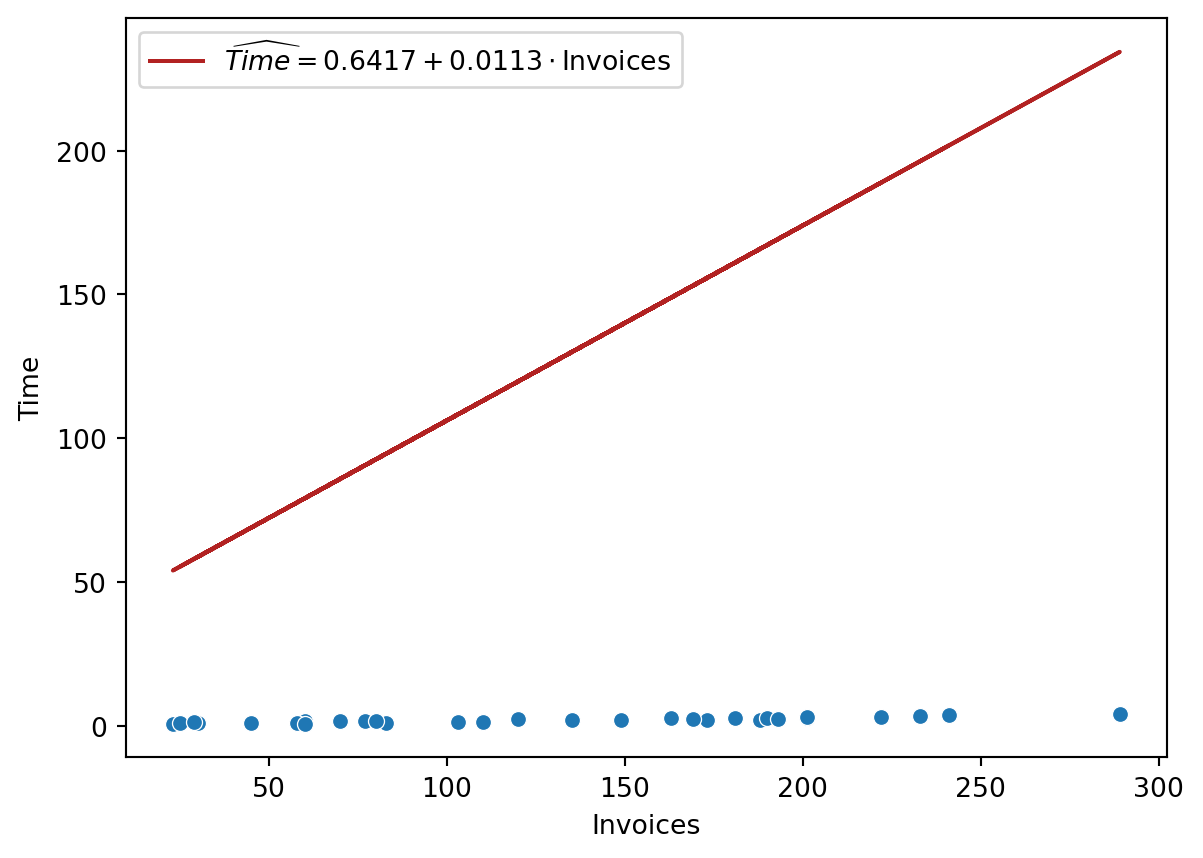

In [33]:
fig, ax = plt.subplots()

sns.scatterplot(data=invoices, x="Invoices", y="Time", ax=ax)
ax.plot(invoices["Invoices"], Time_predicted_OLS, "-", color='firebrick', label=r"$\widehat{Time} = 0.6417 + 0.0113 \cdot \text{Invoices}$")

ax.legend(loc=0)

## Die Geometrie der KQ-Methode

Um die Darstellung einfach zu halten, betrachten wir einen Datensatz mit nur zwei Beobachtungen und eine Prognosegleichung ohne Achsenabschnitt (Intercept).

$$
\hat{y} = \hat{\beta}_1 x
$$

In [34]:
dt_2d = pd.DataFrame({'x': [1, 1.5], 'y': [1, 0.2]})
dt_2d

,x,y
0,1.0,1.0
1,1.5,0.2


Die Daten (y-Werte) können wir als einen zweidimensionalen Vektor betrachten (eine Dimension pro jede Beobachtung).
 Die Prädiktorvariable $x$ können wir auch als einen zweidimensionalen Vektor auffassen.

Text(70, -20, '$\\hat{\\beta}_1 x - y$')

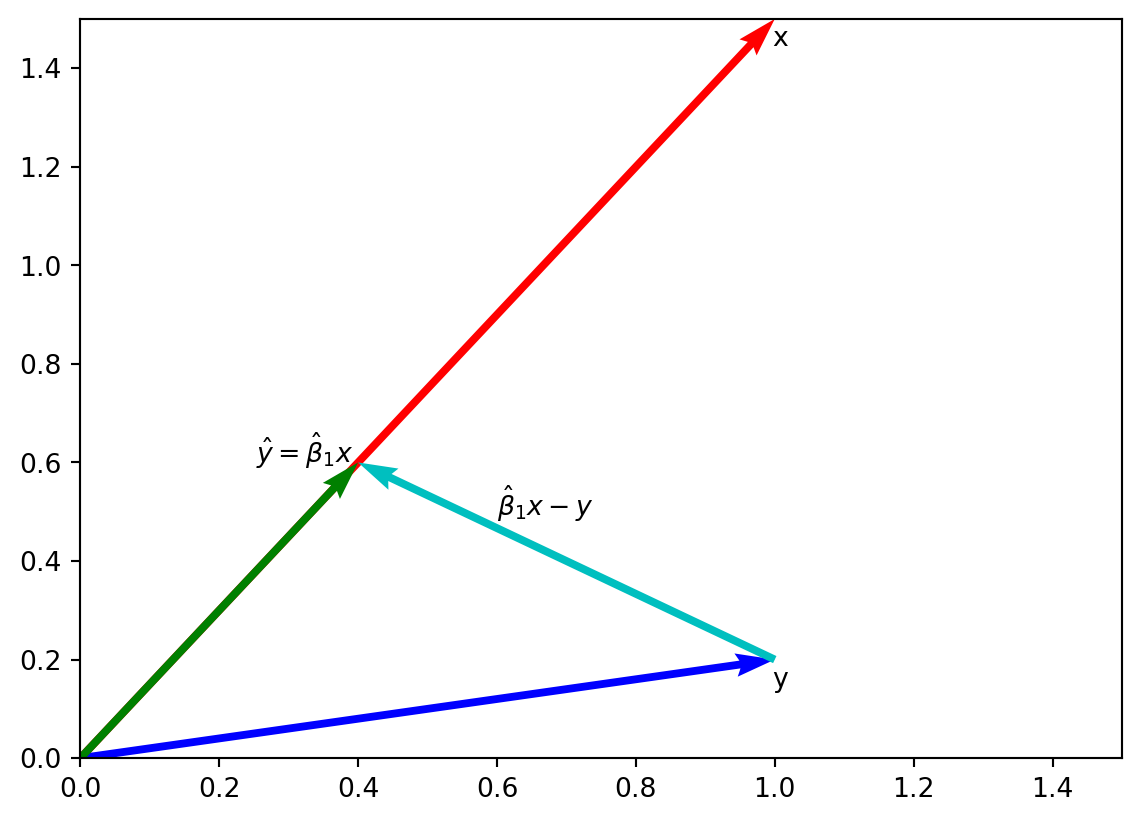

In [35]:
#| label: fig-vec-proj
#| fig-cap: Projektion des Vektors y auf den Vektor x.
#| code-fold: true

import numpy as np
import matplotlib.pyplot as plt

X = np.array([2, 3]) / 2
Y = np.array([1, 0.2])

# Create a figure
fig, ax = plt.subplots()
Y_proj = np.dot(X, Y) / np.dot(X, X) * X
Y_min_Y_proj = Y_proj - Y

# Plot the vectors
ax.quiver(0, 0, X[0], X[1], angles='xy', scale_units='xy', scale=1, color='r', label='A')
ax.quiver(0, 0, Y[0], Y[1], angles='xy', scale_units='xy', scale=1, color='b', label='B')
ax.quiver(Y[0], Y[1], Y_min_Y_proj[0], Y_min_Y_proj[1], angles='xy', scale_units='xy', scale=1, color='c', label='C')
ax.quiver(0, 0, Y_proj[0], Y_proj[1], angles='xy', scale_units='xy', scale=1, color='g', label='D')
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.5)

ax.annotate('x', (X[0], X[1]), textcoords="offset points", xytext=(2,-10), ha='center')
ax.annotate('y', (Y[0], Y[1]), textcoords="offset points", xytext=(2,-10), ha='center')
ax.annotate(r"$ \hat{y} = \hat{\beta}_1 x$", (Y_proj[0], Y_proj[1]), textcoords="offset points", xytext=(-20,0), ha='center')
ax.annotate(r"$\hat{\beta}_1 x - y$", (Y_proj[0], Y_proj[1]), textcoords="offset points", xytext=(70,-20), ha='center')

Im zweidimensionalen können wir die Variable $x$ als einen Vector mit Koordinaten $(x_1, x_2)$ darstellen. Die Variable $y$ können wir als einen Vektor mit Koordinaten $(y_1, y_2)$ darstellen. Unsere Aufgabe ist nun, den Vektor $\hat{y} = \hat{\beta}_1 x$ so zu wählen, dass der Abstand zwischen den Vektoren $y$ und $\hat{y}$ minimal ist.

Der Abstand zwischen zwei Vektoren $a$ und $b$ ist definiert als die Länge des Vektors $a - b$. Den kleinsten Abstand erhalten wir, wenn die Zahl $\hat{\beta}_1$ so gewählt wird, dass der Vektor $y - \hat{y}$ senkrecht auf dem Vektor $x$ steht. Das bedeutet, dass das Skalarprodukt von $y - \hat{y}$ und $x$ gleich Null sein muss.

$$
x \cdot (y - \hat{y}) = 0
$$

Das Skalarprodukt von zwei Vektoren $a = (a_1, a_2)$ und $b = (b_1, b_2)$ ist definiert als

$$
a \cdot b = a_1 b_1 + a_2 b_2
$$

oder für $a = (a_1, a_2, \ldots, a_n)$ und $b = (b_1, b_2, \ldots, b_n)$

$$
a \cdot b = \sum_{i=1}^n a_i b_i = a_1 b_1 + a_2 b_2 + \ldots + a_n b_n
$$

Wir können das Skalarprodukt auch als Matrixmultiplikation schreiben

$$
a \cdot b = a^T b = \begin{pmatrix} a_1 & a_2 & \ldots & a_n \end{pmatrix} \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix} = a_1 b_1 + a_2 b_2 + \ldots + a_n b_n
$$

Aus der Bedingung $x \cdot (y - \hat{y}) = 0$ erhalten wir

$$
\begin{align*}
x^T (y - \hat{y}) & = x^T y - x^T \hat{y} = 0 \\
x^T y & = x^T \hat{y} \\
x^T y & = x^T \hat{\beta}_1 x \\
x^T y & = \hat{\beta}_1 x^T x \\
\hat{\beta}_1 & = \frac{x^T y}{x^T x}
\end{align*}
$$

Im letzten Schritt dürfen wir durch $x^T x$ teilen, weil $x^T x$ eine Zahl (nicht ein Vektor oder eine Matrix) und ungleich Null ist (es ist die Summe der Quadrate der Elemente von $x$).

Dieser Ansatz lässt sich auf mehrdimensionale Daten verallgemeinern. Die Prognosegleichung lautet dann (für $p$ Prädiktorvariablen und $n$ Beobachtungen)

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \ldots + \hat{\beta}_p x_p
$$

Die einzelnen Gleichungen für jede Beobachtung sind

$$
\begin{align*}
\hat{y}_1 & = \hat{\beta}_1 x_{11} + \hat{\beta}_2 x_{12} + \ldots + \hat{\beta}_p x_{1p} \\
\hat{y}_2 & = \hat{\beta}_1 x_{21} + \hat{\beta}_2 x_{22} + \ldots + \hat{\beta}_p x_{2p} \\
\vdots & \\
\hat{y}_n & = \hat{\beta}_1 x_{n1} + \hat{\beta}_2 x_{n2} + \ldots + \hat{\beta}_p x_{np}
\end{align*}
$$

Dieses Gleichungssystem lässt sich in Matrixschreibweise darstellen

$$
\begin{pmatrix}
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_n
\end{pmatrix}
=
\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1p} \\
x_{21} & x_{22} & \ldots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \ldots & x_{np}
\end{pmatrix}
\begin{pmatrix}
\hat{\beta}_1 \\
\hat{\beta}_2 \\
\vdots \\
\hat{\beta}_p
\end{pmatrix}
$$

oder kurz

$$
\hat{y}_{1 \times n} = X_{n \times p} \hat{\beta}_{p \times 1}
$$

Eine ähnliche Herleitung wie oben wird verlangen, daß der Prognosevektor orthogonal auf den Spalten von $X$ steht. Das bedeutet, daß die Matrix $X^T (y - \hat{y})$ gleich Null sein muss.

$$
\begin{align*}
X^T (y - \hat{y}) & = 0 \\
X^T y & = X^T \hat{y} \\
X^T y & = X^T X \hat{\beta} \\
\end{align*}
$$

Hier können wir allerdings nicht einfach durch $X^T X$ dividieren, als wir es im zweidimensionalen Fall gemacht haben, da $X^T X$ eine ganze Matrix ist. Wir können allerdings die Inverse der Matrix $X^T X$ verwenden. Diese bezeichnen wir mit $(X^T X)^{-1}$.

Die Inverse einer quadratischen Matrix ist eine Matrix, die, wenn sie mit der ursprünglichen Matrix multipliziert wird, die Einheitsmatrix ergibt.

$$
A A^{-1} = A^{-1} A = I
$$

In [36]:
A = np.array([[1, 2], [-2, 1]])
A

array([[ 1,  2],
       [-2,  1]])

In [37]:
# Mit np.linalg.inv() berechnen wir die Inverse einer Matrix

A_inverse = np.linalg.inv(A)
A_inverse

array([[ 0.2, -0.4],
       [ 0.4,  0.2]])

In [38]:
# The @ operator is used for matrix multiplication this is different from A * A_inverse
# A * A_inverse

# Die Multiplikation von A mit der Inversen von A ergibt die Einheitsmatrix (1 auf der Diagonale, 0 sonst)
A @ A_inverse

array([[1., 0.],
       [0., 1.]])

In [39]:
A_inverse @ A

array([[1., 0.],
       [0., 1.]])

Falls die Inverse von $X^T X$ existiert, können wir die Koeffizienten $\hat{\beta}$ wie folgt darstellen

$$
\begin{align*}
\underbrace{(X^T X)^{-1} (X^T X)}_{I} \hat{\beta} = (X^T X)^{-1} X^T y \\
\hat{\beta} = (X^T X)^{-1} X^T y
\end{align*}
$$


Man kann zeigen, daß die Inverse von $X^T X$ dann existiert, wenn die Spalten von $X$ linear unabhängig sind. Das bedeutet, daß keine Spalte durch eine Linearkombination der anderen Spalten dargestellt werden kann.

In [40]:
X1 = np.array([[1, 2], [1, 4], [1, 2], [1, -2]])
print(X1)

X1.T @ X1

[[ 1  2]
 [ 1  4]
 [ 1  2]
 [ 1 -2]]


array([[ 4,  6],
       [ 6, 28]])

In [41]:
np.linalg.inv(X1.T @ X1)

array([[ 0.36842105, -0.07894737],
       [-0.07894737,  0.05263158]])

In [42]:
# Schauen wir uns was passiert, wenn wir die zweite Spalte auf 2 (z.B) setzen

X2 = X1.copy()

X2[:, 1] = 2
X2

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [43]:
X2.T @ X2

array([[ 4,  8],
       [ 8, 16]])

In [44]:
# np.linalg.inv(X2.T @ X2)

Dasselbe passiert, falls eine Spalte von X eine Linearkombination der anderen Spalten ist.

In [45]:
X3 = X1.copy()
new_column = X3[:,0] + X3[:,1]
print(new_column)

X3_new = np.concatenate([X3, new_column.reshape(4, 1)], axis=1)
X3_new

[ 3  5  3 -1]


array([[ 1,  2,  3],
       [ 1,  4,  5],
       [ 1,  2,  3],
       [ 1, -2, -1]])

In [46]:

X3_new.T @ X3_new

array([[ 4,  6, 10],
       [ 6, 28, 34],
       [10, 34, 44]])

In [47]:
# np.linalg.inv(X3_new.T @ X3_new)

In [48]:
# np.linalg.det(X3_new.T @ X3_new)